-----------------------------------------
organic
-----------------------------------------
Galaxy "organic" redshift: 7.05	 total:  x:101925.94820548783	 y:32776.591147647436	 z:3331.406686234261
Galaxy "organic" redshift: 5.971	 total:  x:850021.9852183292	 y:-198800.0883635973	 z:966492.0625338005
Galaxy "organic" redshift: 5.487	 total:  x:681867.8164785794	 y:1186817.7121323594	 z:-1938516.785638578
Galaxy "organic" redshift: 5.037	 total:  x:-63208.205422010295	 y:677514.2899323015	 z:40524.95679109486
Galaxy "organic" redshift: 4.485	 total:  x:-263925.1743692213	 y:2423069.6922421725	 z:-262998.1159401826
Galaxy "organic" redshift: 3.984	 total:  x:1389978.575934871	 y:738672.5922251961	 z:688149.0038387688
Galaxy "organic" redshift: 3.528	 total:  x:3979977.2740364317	 y:-2417132.5861926153	 z:-1616821.6921565605
Galaxy "organic" redshift: 3.017	 total:  x:-2694869.758655284	 y:1918658.734240054	 z:-10316078.40775014
Galaxy "organic" redshift: 2.478	 total:  x:-2875639.8536102

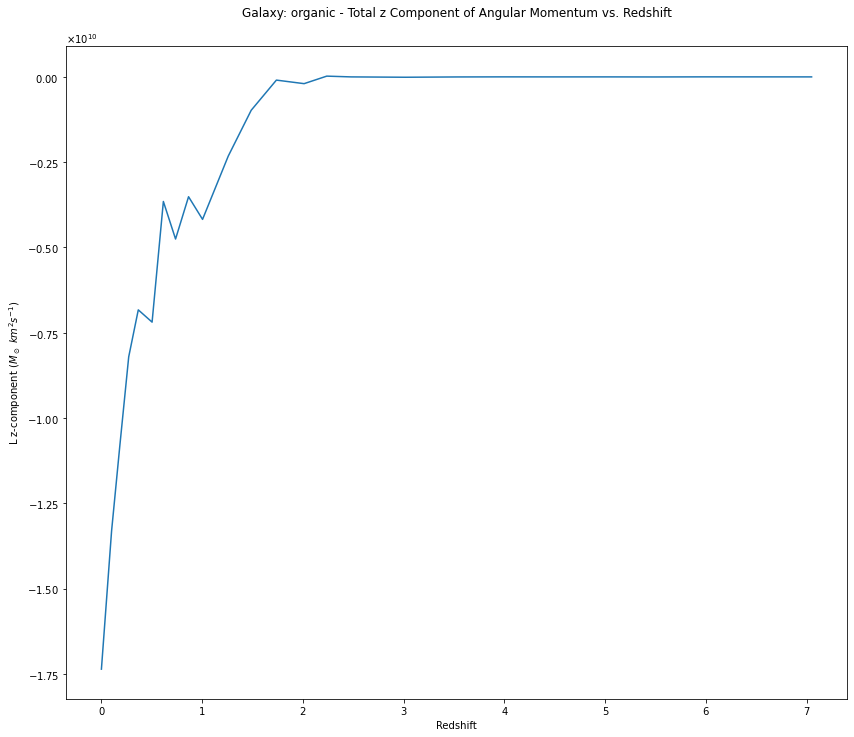

-----------------------------------------
gm_late
-----------------------------------------
Galaxy "gm_late" redshift: 7.05	 total:  x:-153597.32563059143	 y:-228496.46204218542	 z:-201023.08416768996
Galaxy "gm_late" redshift: 5.971	 total:  x:-243949.19212195824	 y:-144450.93131035843	 z:-179868.63231634995
Galaxy "gm_late" redshift: 5.487	 total:  x:-15554.386508062133	 y:154467.77110551074	 z:397464.7846287094
Galaxy "gm_late" redshift: 5.037	 total:  x:337234.979496729	 y:-494838.7487707038	 z:180012.9295886788
Galaxy "gm_late" redshift: 4.485	 total:  x:139743.2340564982	 y:-424726.7584621184	 z:-389836.4065116989
Galaxy "gm_late" redshift: 3.984	 total:  x:1235801.2539991478	 y:977241.4277852637	 z:-1015132.4413575378
Galaxy "gm_late" redshift: 3.528	 total:  x:3256938.699968425	 y:858143.095703453	 z:566910.3255982313
Galaxy "gm_late" redshift: 3.017	 total:  x:13003396.468719892	 y:-13805214.33895794	 z:-5100532.691949807
Galaxy "gm_late" redshift: 2.478	 total:  x:2815254.997

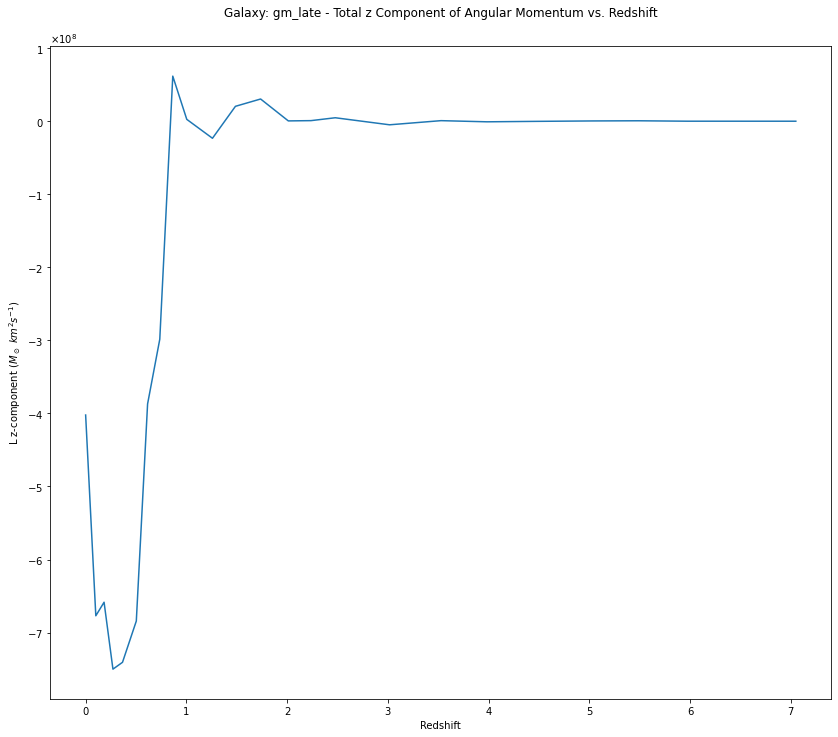

-----------------------------------------
gm_early
-----------------------------------------
Galaxy "gm_early" redshift: 7.05	 total:  x:81467.04392132658	 y:819.2210879486975	 z:19782.87960621372
Galaxy "gm_early" redshift: 5.971	 total:  x:87828.96064733849	 y:-191723.55497199323	 z:-553672.5702363868
Galaxy "gm_early" redshift: 5.487	 total:  x:-597658.2417148685	 y:1727.9893352766812	 z:-970339.2707972609
Galaxy "gm_early" redshift: 5.037	 total:  x:2862311.5134532982	 y:2366006.7477869475	 z:-7958497.478279387
Galaxy "gm_early" redshift: 4.485	 total:  x:1783788.1183209703	 y:6709132.319175492	 z:-5308258.858318466
Galaxy "gm_early" redshift: 3.984	 total:  x:-9282265.604569033	 y:4991985.599158261	 z:-4461385.77630834
Galaxy "gm_early" redshift: 3.528	 total:  x:-9306243.46083395	 y:36674441.76493198	 z:5299959.4252882255
Galaxy "gm_early" redshift: 3.017	 total:  x:54579762.498050205	 y:70101307.4248579	 z:22042608.18945438
Galaxy "gm_early" redshift: 2.478	 total:  x:1096368367

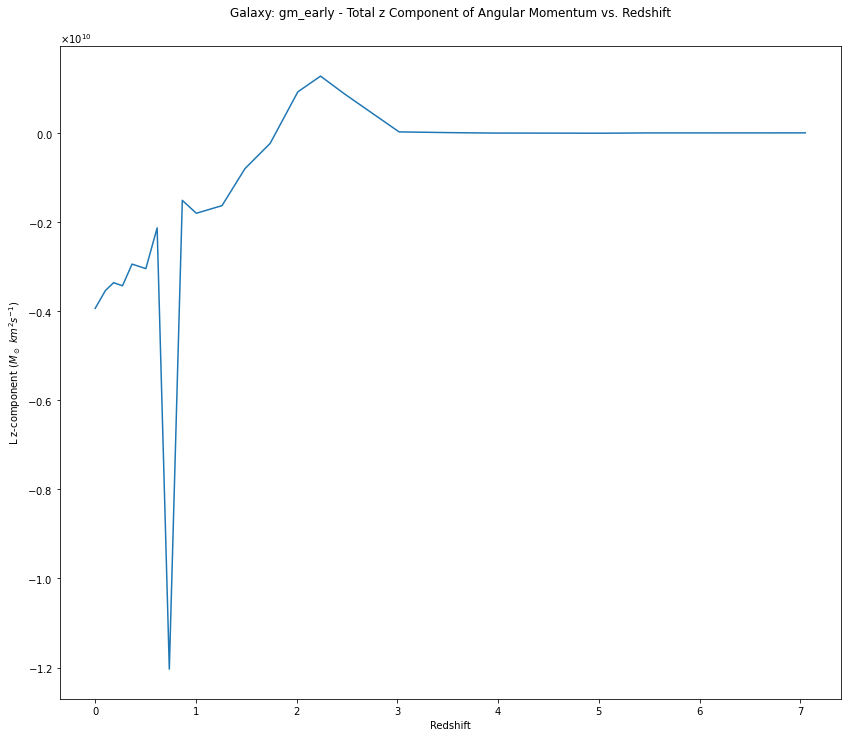

In [50]:
import h5py
import matplotlib.pyplot as plt
from os import listdir
from mpl_toolkits import mplot3d
import matplotlib.gridspec as gridspec
import numpy as np
import re

axisScale = 0.03
datasets = ['organic', 'gm_late', 'gm_early']

for dataset in datasets:
    print('-----------------------------------------')
    print(dataset)
    print('-----------------------------------------')
    
    files = listdir('data/' + dataset)

    count = 0

    galaxyAm = np.array(range(96), dtype=float).reshape(24,4)
    
    for file in files:
    #if 1==1:



        #file = 'star_particles_015_z002p012.hdf5'
        #file = 'star_particles_028_z000p000.hdf5'
        
        # get redshift from the filename
        m = re.search('(z[0-9])\w+', file)
        s = m.group(0).replace('z', '')
        s = s.replace('p', '.')
        
        redshift = float(s)
        #print('redshift = ' + s + ' converted: ' + str(redshift))
        
        # load data for a particular galaxy at a particular redshift
        f = h5py.File('data/' + dataset + '/' + file,'r')

        ds_c = f['Coordinates']
        ds_v = f['Velocity']
        ds_m = f['Mass']
        
        #print ('length: ' + str(np.shape(ds_c)[0]))
        #for pv in ds_c:
        #    print ('x:' + str(pv[0]) + '\t y:' + str(pv[1]) + '\t z:' + str(pv[2]))
        

        # Calculate angular momentum vector for each particle and sum into rTot
        rTot = [0, 0, 0]
        # Swap this for test mode to stop it taking forever
        #for n in range(0, 10):
        for n in range(0, np.shape(ds_c)[0]):
            pv = ds_c[n]
            linMv = ds_m[n] * ds_v[n]
            
            r = np.cross(pv, linMv)
            #print ('x:' + str(r[0]) + '\t y:' + str(r[1]) + '\t z:' + str(r[2]))
            rTot = rTot + r

        # Store totals of all particles for each redshift in the current galaxy
        galaxyAm[count, 0] = rTot[0]
        galaxyAm[count, 1] = rTot[1]
        galaxyAm[count, 2] = rTot[2]
        galaxyAm[count, 3] = redshift
              
        count = count + 1
    
    # print each angular momentum component's total per redshift
    for n in range(24):
        print('Galaxy "' + dataset + '" redshift: ' + str(galaxyAm[n][3]) + '\t total:  x:' + str(galaxyAm[n][0]) + '\t y:' + str(galaxyAm[n][1]) + '\t z:' + str(galaxyAm[n][2]))
    
    #print ('length: ' + str(np.shape(galaxyAm)[0]))
    plt.plot(galaxyAm[0:,3], galaxyAm[0:,2])
    plt.title('Galaxy: ' + dataset + ' - Total z Component of Angular Momentum vs. Redshift', pad=30)
    plt.xlabel('Redshift')
    plt.ylabel(r'L z-component ($M_\odot\ km^{2} s^{-1})$')
    plt.ticklabel_format(axis='y', style='sci', useMathText=True)
    plt.rcParams["figure.figsize"] = (14,12)
    plt.show()    